<a href="https://colab.research.google.com/github/gunwes16/Data-110/blob/main/ChrisLeiby_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This dataset provides a comprehensive record of trash collection activities in Baltimore from 2014 to 2023, detailing various metrics related to waste removal and environmental impact. The data includes information such as: Collection dates, months, and years, Weight (in tons) and volume (in cubic yards) of trash collected.

Estimated number of homes powered as a result of waste-to-energy conversion

🛢️ Details per dumpster



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [5]:
df = pd.read_csv('trash_collection_Baltimore_2014-23.csv')

In [10]:
df_cleaned = df.drop(columns=['Unnamed: 14', 'Unnamed: 15'], errors='ignore')
df_cleaned = df_cleaned.dropna()

In [13]:
df_cleaned.info(), df_cleaned.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 629 entries, 0 to 628
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Dumpster              629 non-null    float64
 1   Month                 629 non-null    object 
 2   Year                  629 non-null    float64
 3   Date                  629 non-null    object 
 4   Weight (tons)         629 non-null    object 
 5   Volume (cubic yards)  629 non-null    object 
 6   Plastic Bottles       629 non-null    object 
 7   Polystyrene           629 non-null    object 
 8   Cigarette Butts       629 non-null    object 
 9   Glass Bottles         629 non-null    object 
 10  Plastic Bags          629 non-null    object 
 11  Wrappers              629 non-null    object 
 12  Sports Balls          629 non-null    object 
 13  Homes Powered*        629 non-null    object 
dtypes: float64(2), object(12)
memory usage: 73.7+ KB


(None,
 Dumpster                0
 Month                   0
 Year                    0
 Date                    0
 Weight (tons)           0
 Volume (cubic yards)    0
 Plastic Bottles         0
 Polystyrene             0
 Cigarette Butts         0
 Glass Bottles           0
 Plastic Bags            0
 Wrappers                0
 Sports Balls            0
 Homes Powered*          0
 dtype: int64)

In [27]:
df.head()

,Dumpster,Month,Year,Date,Weight (tons),Volume (cubic yards),Plastic Bottles,Polystyrene,Cigarette Butts,Glass Bottles,Plastic Bags,Wrappers,Sports Balls,Homes Powered*,Unnamed: 14,Unnamed: 15
0,1.0,May,2014.0,5/16/2014,4.31,18,"1,450","1,820","126,000",72,584,"1,162",7,0,NaN,NaN
1,2.0,May,2014.0,5/16/2014,2.74,13,"1,120","1,030","91,000",42,496,874,5,0,NaN,NaN
2,3.0,May,2014.0,5/16/2014,3.45,15,"2,450","3,100","105,000",50,"1,080","2,032",6,0,NaN,NaN
3,4.0,May,2014.0,5/17/2014,3.1,15,"2,380","2,730","100,000",52,896,"1,971",6,0,NaN,NaN
4,5.0,May,2014.0,5/17/2014,4.06,18,980,870,"120,000",72,368,753,7,0,NaN,NaN


In [29]:
df.tail()

,Dumpster,Month,Year,Date,Weight (tons),Volume (cubic yards),Plastic Bottles,Polystyrene,Cigarette Butts,Glass Bottles,Plastic Bags,Wrappers,Sports Balls,Homes Powered*,Unnamed: 14,Unnamed: 15
625,626.0,December,2023.0,12/20/2023,3.01,15,"1,400",120,"2,900",12,220,980,32,50,NaN,NaN
626,627.0,December,2023.0,12/20/2023,2.34,15,880,75,"2,600",8,140,"1,400",10,39,NaN,NaN
627,628.0,December,2023.0,12/23/2023,2.88,15,"2,000",140,"3,200",18,200,"1,900",22,48,NaN,NaN
628,629.0,December,2023.0,12/23/2023,2.51,15,"1,200",210,"4,000",27,250,"1,600",21,42,NaN,NaN
629,NaN,NaN,NaN,NaN,"2,019.54","9,589","1,246,155","920,011","11,735,100","13,502","545,554","898,129","8,553","30,020",NaN,NaN


In [36]:
df_cleaned['Year'] = df_cleaned['Year'].astype(int)
df_cleaned['Year'].unique()

array([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

In [37]:
columns_to_convert = [
    "Weight (tons)", "Volume (cubic yards)", "Plastic Bottles", "Polystyrene",
    "Cigarette Butts", "Glass Bottles", "Plastic Bags", "Wrappers",
    "Sports Balls", "Homes Powered*"
    ]

In [38]:
for col in columns_to_convert:
    df_cleaned[col] = df_cleaned[col].astype(str).str.replace(',', '', regex=False)
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')

# Convert 'Date' to datetime format
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], errors='coerce')

# Drop rows with missing critical values
df_cleaned = df_cleaned.dropna(subset=['Year', 'Date'])

In [18]:
# Summary of dataset
print(df_cleaned.describe())

# Number of entries per year
print(df_cleaned['Year'].value_counts().sort_index())

# Group by Year and get average of key metrics
yearly_summary = df_cleaned.groupby('Year')[[
    'Weight (tons)', 'Volume (cubic yards)', 'Plastic Bottles',
    'Polystyrene', 'Cigarette Butts', 'Glass Bottles',
    'Plastic Bags', 'Wrappers', 'Sports Balls'
]].mean().round(2)

print(yearly_summary)

        Dumpster         Year                           Date  Weight (tons)  \
count  629.00000   629.000000                            629     629.000000   
mean   315.00000  2018.597774  2019-02-12 11:26:48.267090432       3.210715   
min      1.00000  2014.000000            2014-05-16 00:00:00       0.780000   
25%    158.00000  2016.000000            2016-10-09 00:00:00       2.720000   
50%    315.00000  2019.000000            2019-01-23 00:00:00       3.200000   
75%    472.00000  2021.000000            2021-06-11 00:00:00       3.730000   
max    629.00000  2023.000000            2023-12-23 00:00:00       5.620000   
std    181.72094     2.740135                            NaN       0.743146   

       Volume (cubic yards)  Plastic Bottles  Polystyrene  Cigarette Butts  \
count            629.000000       629.000000   629.000000       629.000000   
mean              15.244833      1981.168521  1462.656598     18656.756757   
min                7.000000        80.000000    20.000

In [19]:
# Total collection per year (Weight)
total_weight_year = df_cleaned.groupby('Year')['Weight (tons)'].sum()

# Year with maximum collection
max_year = total_weight_year.idxmax()
print(f"Year with highest total trash collection (tons): {max_year}")

Year with highest total trash collection (tons): 2018.0


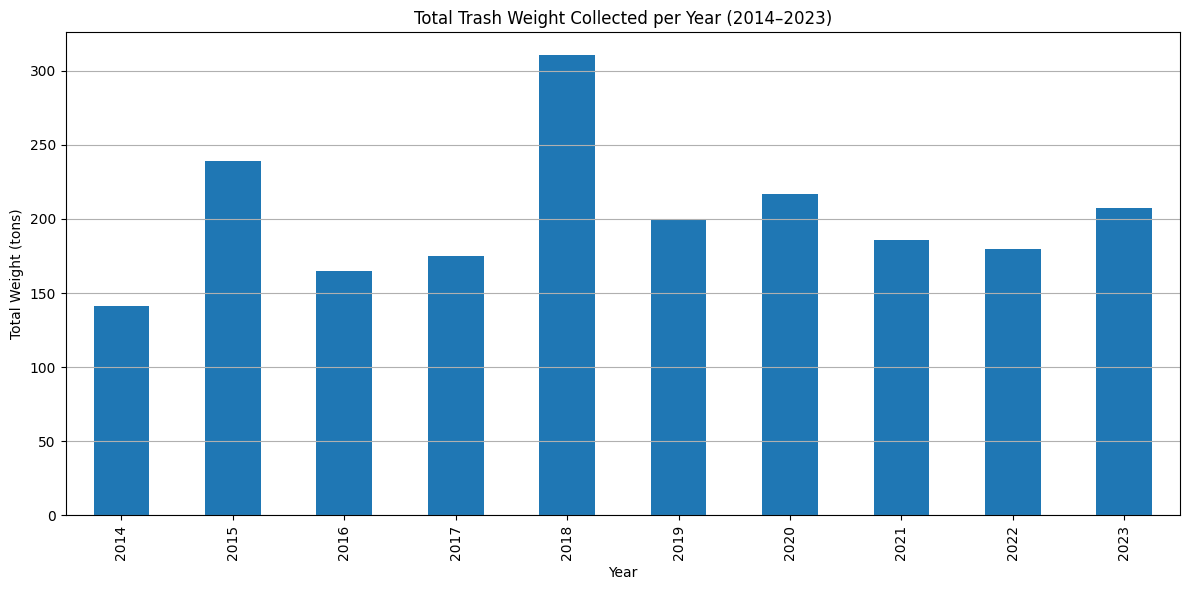

In [39]:
total_weight_per_year = df_cleaned.groupby('Year')["Weight (tons)"].sum()

plt.figure(figsize=(12, 6))
total_weight_per_year.plot(kind='bar')
plt.title("Total Trash Weight Collected per Year (2014–2023)")
plt.xlabel("Year")
plt.ylabel("Total Weight (tons)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<ipython-input-21-718f0fd0295a>:8: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


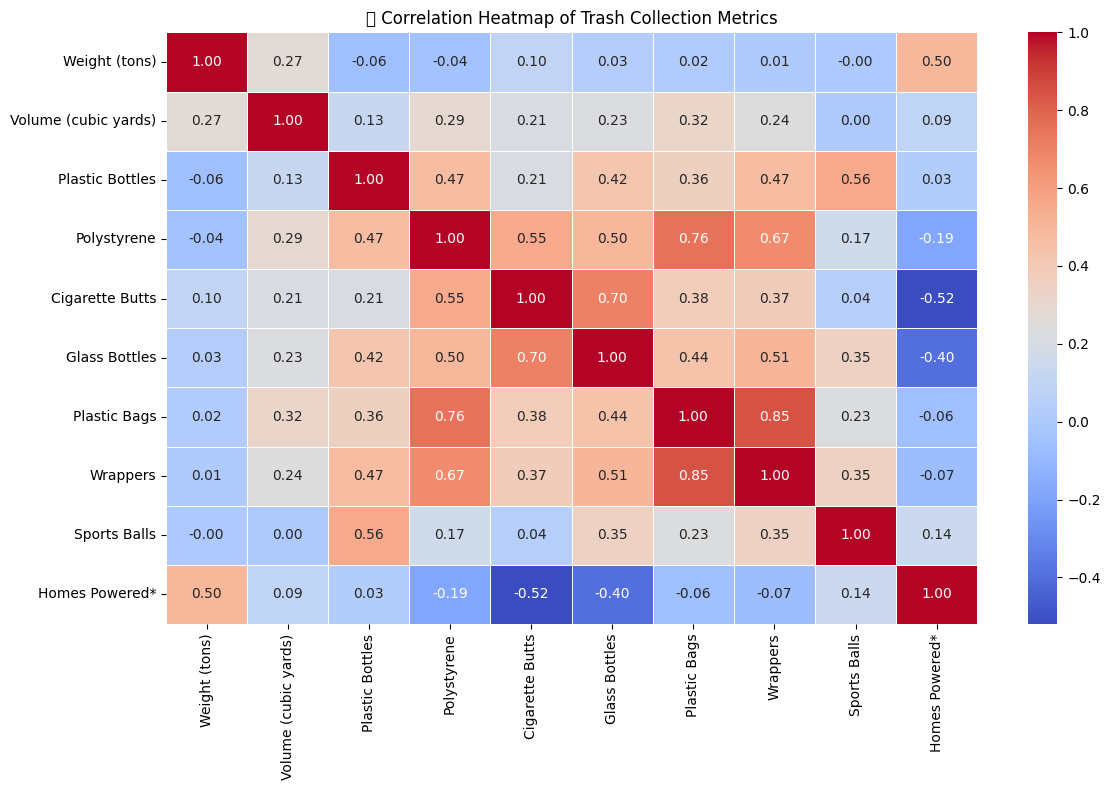

In [21]:
# Compute correlation matrix
correlation_matrix = df_cleaned[columns_to_convert].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("🔥 Correlation Heatmap of Trash Collection Metrics")
plt.tight_layout()
plt.show()

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Define features and target
X = df_cleaned[[
    "Volume (cubic yards)", "Plastic Bottles", "Polystyrene",
    "Cigarette Butts", "Glass Bottles", "Plastic Bags",
    "Wrappers", "Sports Balls", "Homes Powered*"
]]
y = df_cleaned["Weight (tons)"]

# Add constant for statsmodels
X_const = sm.add_constant(X)

# Fit OLS model using statsmodels
model = sm.OLS(y, X_const).fit()

# Get predictions and residuals
predictions = model.predict(X_const)
residuals = y - predictions

# Display summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Weight (tons)   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     70.19
Date:                Wed, 02 Apr 2025   Prob (F-statistic):           1.22e-88
Time:                        00:56:07   Log-Likelihood:                -484.08
No. Observations:                 629   AIC:                             988.2
Df Residuals:                     619   BIC:                             1033.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.6748      0.247      2.729      0.007       0.189       1.161
Volume (cubic yards)     0.0772      0.017      4.583      0.000       0.044       0.110
Plastic Bottles      -8.747e-05   2.82e-05     -3.102      0.002      -0.000   -3.21e-05
Polystyrene             -0.0001   3.12e-05     -3.873      0.000      -0.000   -5.96e-05
Cigarette Butts       1.398e-05   1.23e-06     11.371      0.000    1.16e-05    1.64e-05
Glass Bottles            0.0056      0.002      2.484      0.013       0.001       0.010
Plastic Bags         -5.203e-05    5.8e-05     -0.897      0.370      -0.000    6.19e-05
Wrappers              3.187e-05   4.96e-05      0.643      0.520   -6.54e-05       0.000
Sports Balls            -0.0056      0.003     -1.955      0.051      -0.011    2.59e-05
Homes Powered*           0.0294      0.001     22.077      0.000       0.027       0.032
==============================================================================
Omnibus:                      150.956   Durbin-Watson:                   1.332
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              528.866
Skew:                           1.095   Prob(JB):                    1.44e-115
Kurtosis:                       6.922   Cond. No.                     4.06e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
df_cleaned = df.drop(columns=['Unnamed: 14', 'Unnamed: 15'], errors='ignore')

columns_to_convert = [
    "Weight (tons)", "Volume (cubic yards)", "Plastic Bottles", "Polystyrene",
    "Cigarette Butts", "Glass Bottles", "Plastic Bags", "Wrappers",
    "Sports Balls", "Homes Powered*"
]

for col in columns_to_convert:
    df_cleaned[col] = df_cleaned[col].astype(str).str.replace(',', '', regex=False)
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')

df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], errors='coerce')
df_cleaned = df_cleaned.dropna(subset=['Year', 'Date'])

# Group data by year
grouped_by_year = df_cleaned.groupby('Year')[[
    'Homes Powered*', 'Weight (tons)', 'Volume (cubic yards)'
]].sum()

grouped_by_year

,Homes Powered*,Weight (tons),Volume (cubic yards)
Year,,,
2014.0,0,141.35,669
2015.0,2714,238.80,1103
2016.0,2747,164.59,816
2017.0,2921,174.84,885
2018.0,5177,310.39,1425
2019.0,3341,200.24,989
2020.0,3616,216.68,1080
2021.0,3090,185.53,870
2022.0,3000,179.63,847


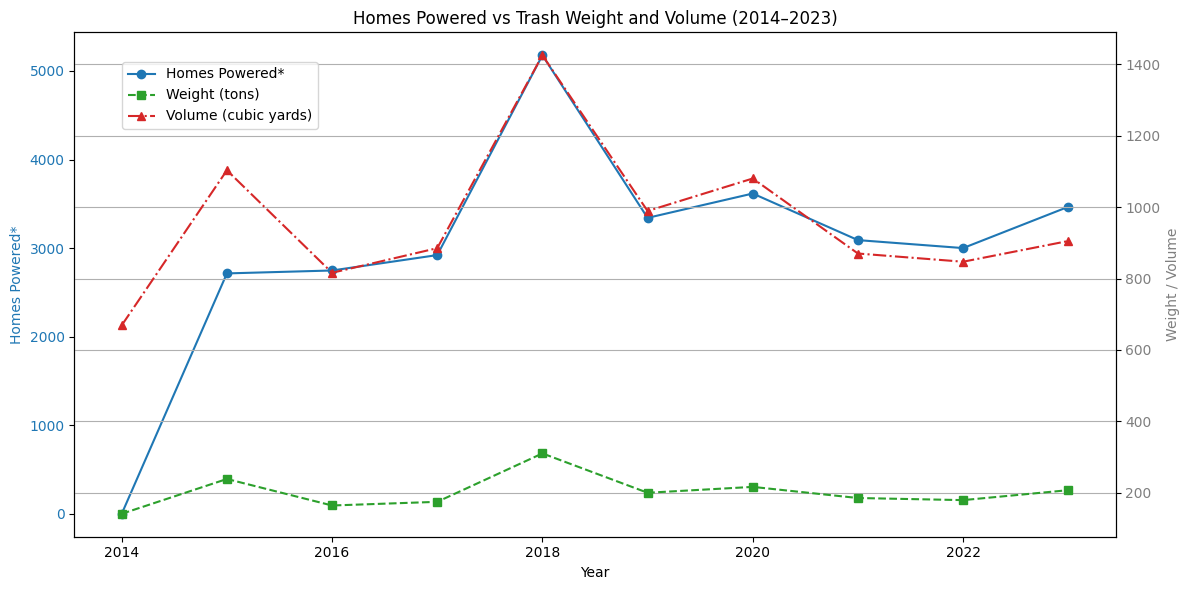

In [42]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# First axis: Homes Powered
ax1.set_xlabel("Year")
ax1.set_ylabel("Homes Powered*", color='tab:blue')
ax1.plot(grouped_by_year.index, grouped_by_year["Homes Powered*"], color='tab:blue', marker='o', label='Homes Powered*')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Second axis: Weight and Volume
ax2 = ax1.twinx()
ax2.set_ylabel("Weight / Volume", color='tab:gray')
ax2.plot(grouped_by_year.index, grouped_by_year["Weight (tons)"], color='tab:green', linestyle='--', marker='s', label='Weight (tons)')
ax2.plot(grouped_by_year.index, grouped_by_year["Volume (cubic yards)"], color='tab:red', linestyle='-.', marker='^', label='Volume (cubic yards)')
ax2.tick_params(axis='y', labelcolor='tab:gray')

# Title and Legend
plt.title("Homes Powered vs Trash Weight and Volume (2014–2023)")
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.grid(True)
plt.show()

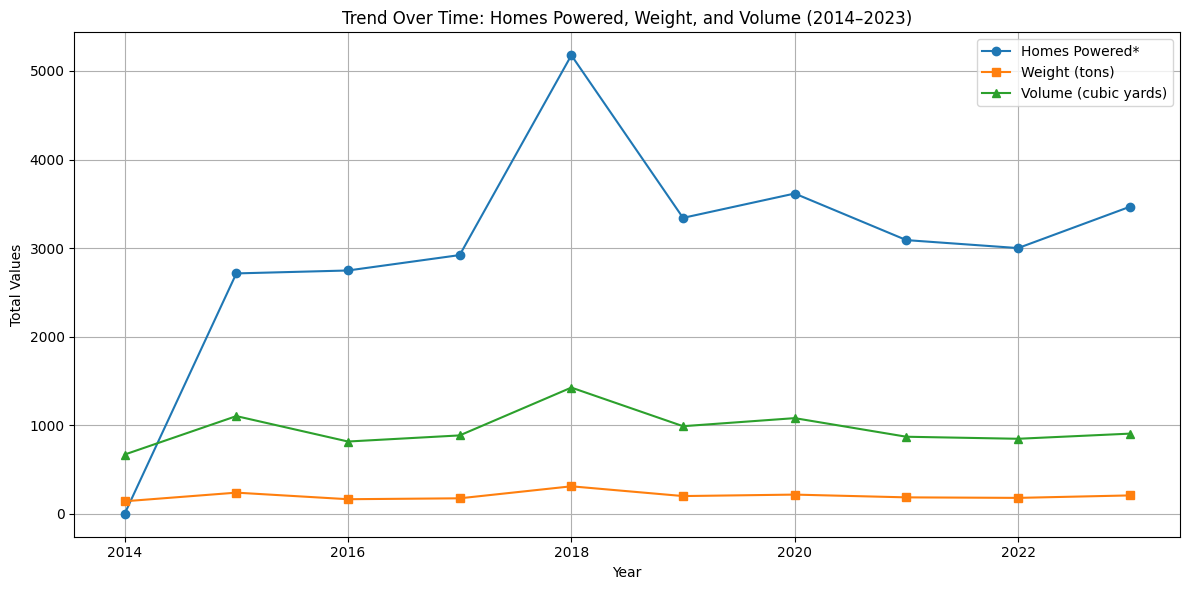

In [26]:
# Create a line chart for all three metrics over time
plt.figure(figsize=(12, 6))
plt.plot(grouped_by_year.index, grouped_by_year["Homes Powered*"], marker='o', label="Homes Powered*")
plt.plot(grouped_by_year.index, grouped_by_year["Weight (tons)"], marker='s', label="Weight (tons)")
plt.plot(grouped_by_year.index, grouped_by_year["Volume (cubic yards)"], marker='^', label="Volume (cubic yards)")

plt.title("Trend Over Time: Homes Powered, Weight, and Volume (2014–2023)")
plt.xlabel("Year")
plt.ylabel("Total Values")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [30]:
categorical_columns = ['Month', 'Year', 'Dumpster']
categorical_summary = {col: df_cleaned[col].value_counts() for col in categorical_columns}
categorical_summary

{'Month': Month
 June          84
 July          81
 April         74
 August        55
 November      50
 December      49
 May           48
 September     48
 October       34
 March         32
 February      25
 January       24
 May           15
 March          5
 January        1
 September      1
 April          1
 July           1
 september      1
 Name: count, dtype: int64,
 'Year': Year
 2018.0    93
 2020.0    72
 2015.0    71
 2019.0    66
 2023.0    62
 2021.0    58
 2022.0    57
 2017.0    55
 2016.0    51
 2014.0    44
 Name: count, dtype: int64,
 'Dumpster': Dumpster
 629.0    1
 1.0      1
 2.0      1
 3.0      1
 4.0      1
         ..
 10.0     1
 9.0      1
 8.0      1
 7.0      1
 6.0      1
 Name: count, Length: 629, dtype: int64}

In [32]:
# Clean up the Month column: strip whitespace and standardize capitalization
df_cleaned['Month'] = df_cleaned['Month'].str.strip().str.capitalize()

# Check value counts after cleaning
month_counts_cleaned = df_cleaned['Month'].value_counts()
month_counts_cleaned

,count
Month,
June,84
July,82
April,75
May,63
August,55
September,50
November,50
December,49
March,37


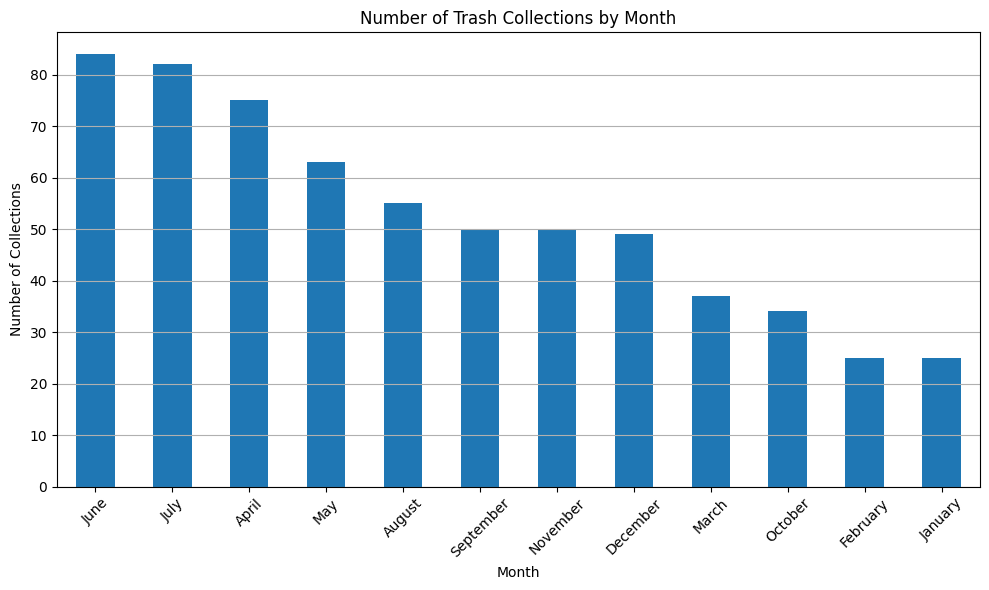

In [34]:
plt.figure(figsize=(10, 6))
month_counts_cleaned.sort_values(ascending=False).plot(kind='bar')

plt.title("Number of Trash Collections by Month")
plt.xlabel("Month")
plt.ylabel("Number of Collections")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

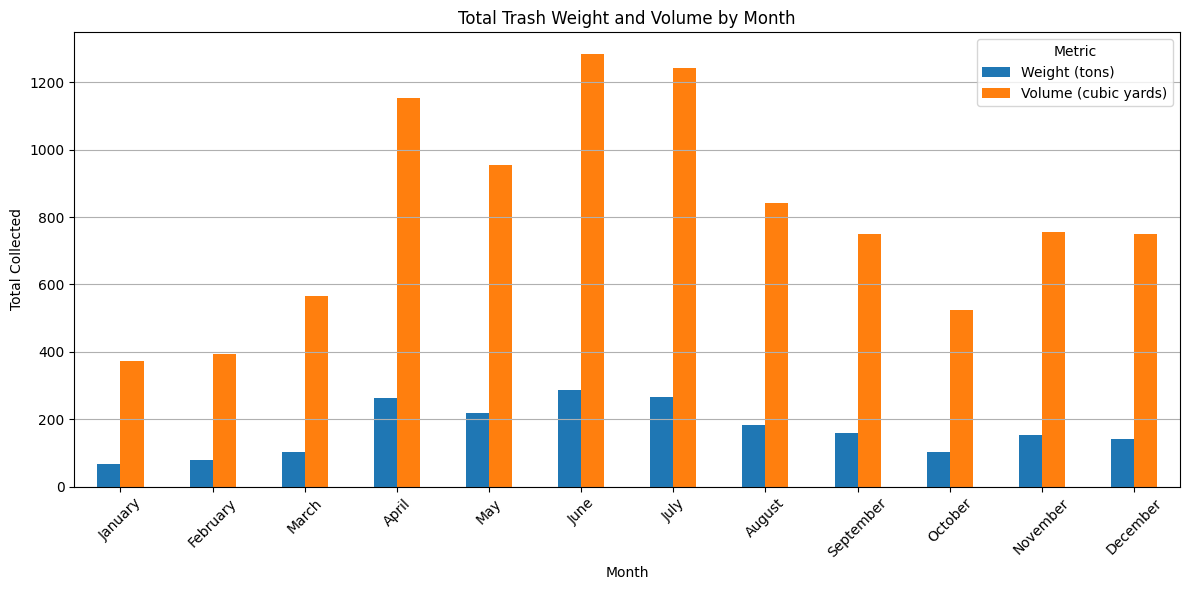

In [41]:
monthly_totals = df_cleaned.groupby('Month')[['Weight (tons)', 'Volume (cubic yards)']].sum()

# Ensure months are in proper calendar order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_totals = monthly_totals.loc[month_order]

# Plot grouped bar chart
monthly_totals.plot(kind='bar', figsize=(12, 6))

plt.title("Total Trash Weight and Volume by Month")
plt.xlabel("Month")
plt.ylabel("Total Collected")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(title="Metric")
plt.tight_layout()
plt.show()





bold text